In [1]:
import numpy as np
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [2]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X) # altera a escala

/home/claesia/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/claesia/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

/home/claesia/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/claesia/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

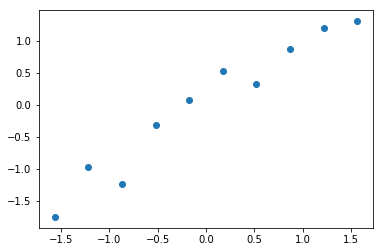

In [13]:
plt.scatter(X, y)

# Fórmula Regressão Linear Simples
y = b0 + b1 * x

In [14]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [15]:
import tensorflow as tf

In [16]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [21]:
# fazendo a minimização do erro
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    
    for i in range(1000):
        sess.run(treinamento)
    
    b0_final, b1_final = sess.run([b0, b1])
    

In [26]:
b0_final

0.07293497

In [27]:
b1_final

0.9359134

In [28]:
pred = b0_final + b1_final * X

In [29]:
pred

array([[-1.3933595 ],
       [-1.06751629],
       [-0.74167307],
       [-0.41582985],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169979],
       [ 0.88754301],
       [ 1.21338623],
       [ 1.53922944]])

In [30]:
type(pred)

numpy.ndarray

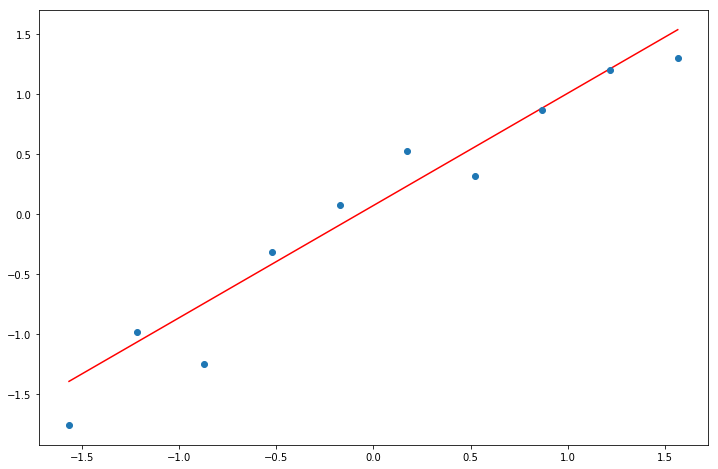

In [36]:
plt.figure(figsize=(12,8))
plt.plot(X, pred, color = 'red')
plt.plot(X, y, 'o')

In [52]:
predi = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.fit_transform([[40]]))
predi

array([[1486.10919312]])

In [55]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [57]:
pred1 = scaler_y.inverse_transform(pred)
pred1

array([[ 993.37307127],
       [1102.86998723],
       [1212.3669032 ],
       [1321.86381917],
       [1431.36073513],
       [1540.8576511 ],
       [1650.35456707],
       [1759.85148303],
       [1869.348399  ],
       [1978.84531497]])

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mae = mean_absolute_error(y1, pred1)
mae

67.91875458994167

In [60]:
mse = mean_squared_error(y1, pred1)
mse

7153.9129941765395